In [1]:
import urllib.request
import os.path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
deliver = os.path.abspath(os.path.dirname('__file__'))
data_dir = os.path.abspath(os.path.relpath('../input/', deliver))

## Import into pandas

In [17]:
df = pd.read_csv(os.path.join(data_dir, 'train.csv'), index_col=0)
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [18]:
df = pd.concat([df, pd.read_csv(os.path.join(data_dir, 'test.csv'), index_col=0)], axis=0)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0.0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1.0,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1.0,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1.0,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0.0,373450


## Age

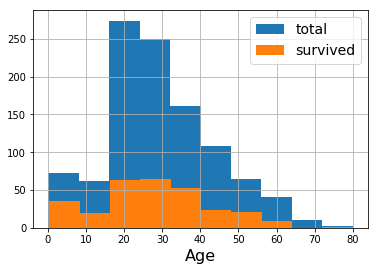

In [19]:
df.Age.hist()
df[df.Survived == 1].Age.hist()
plt.xlabel("Age", fontsize=16)
plt.legend(["total", "survived"], fontsize=14)
plt.show()

### Scaling

In [20]:
age_delta = df.Age.max() - df.Age.min()
df["Age"] = (df.Age - df.Age.min())/age_delta

### Missing values to average

In [25]:
df.loc[df.Age.isnull()]["Age"] = df.Age.mean()

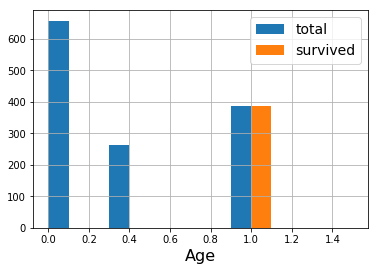

In [26]:
df.Age.hist()
df[df.Survived == 1].Age.hist()
plt.xlabel("Age", fontsize=16)
plt.legend(["total", "survived"], fontsize=14)
plt.show()

## Sex

In [27]:
df.loc[df.Sex == "female"]["Sex"] = 1
df.loc[df.Sex == "male"]["Sex"] = 0

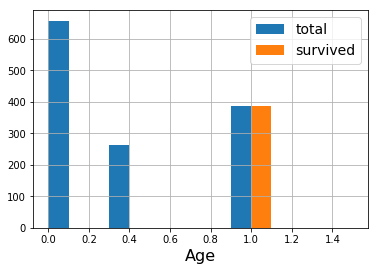

In [28]:
df.Sex.hist()
df[df.Survived == 1].Sex.hist()
plt.xlabel("Sex", fontsize=16)
plt.legend(["total", "survived"], fontsize=14)
plt.show()